# Temperature Forecast

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('temp-pred.csv')
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


Total we have 7752 rows and 25 columns in a dataset

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.shape

(7752, 25)

In [5]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000



here counting are in not euqal that means there some null values to find and treat in a datset This describes the detailed summary of each and every numerical column which gives the count of the data's, mean, standard-deviation, minimum, maxmium, and quantile range of values.

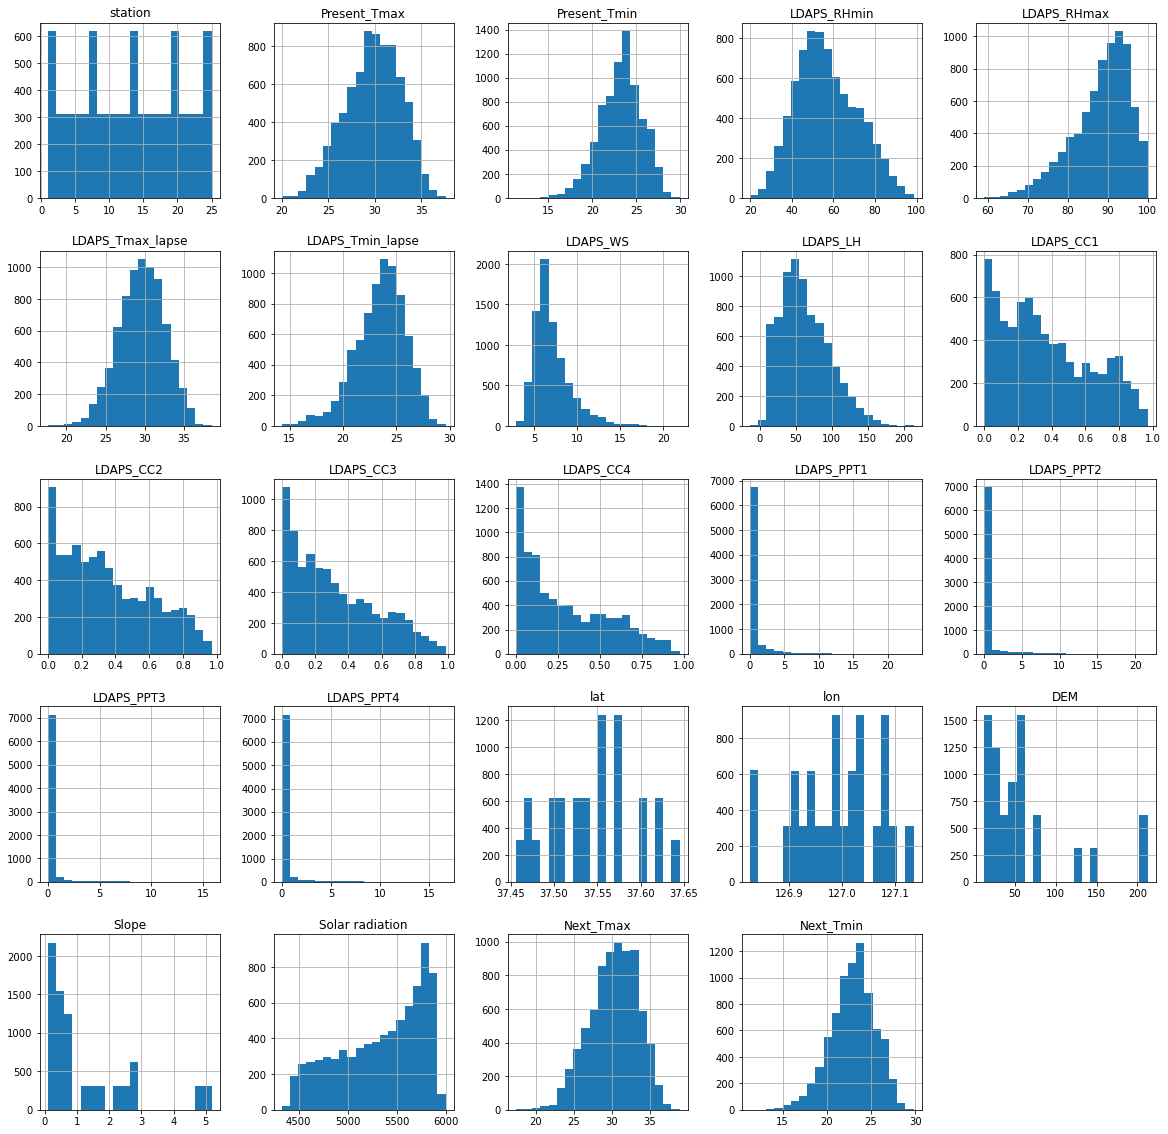

In [6]:
df.hist(bins = 20, figsize = (20,20))
plt.show()

target variables looks normal and have mild skewness,LDAPS_RHmax has left skewed data,LDAPS_PPT1 to LDAPS_PPT4 has skewed more in right as most of the values are 0 in this as per plot Solar radiation has left skewed and LDAPS_CC1 - LDAPS_CC4 has skewness in right side.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


here information of the data tells all are in integer dtypes except date column,there are some treat null value shere

In [8]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
df['Next_Tmax'].value_counts()

29.3    113
33.0    106
31.3    104
29.6    101
31.2     98
       ... 
37.3      1
37.6      1
19.7      1
21.5      1
38.7      1
Name: Next_Tmax, Length: 183, dtype: int64

<AxesSubplot:>

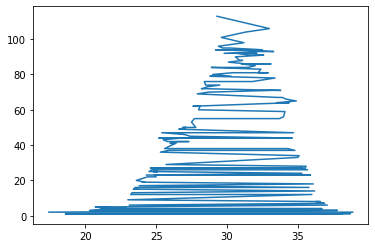

In [10]:
df['Next_Tmax'].value_counts().plot.line()

In [11]:

df['Next_Tmin'].value_counts()

23.5    159
23.4    157
24.0    156
23.2    150
23.8    149
       ... 
29.5      1
13.6      1
13.3      1
13.9      1
12.9      1
Name: Next_Tmin, Length: 157, dtype: int64

<AxesSubplot:>

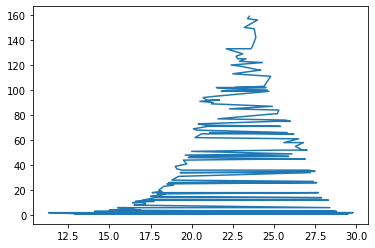

In [12]:
df['Next_Tmin'].value_counts().plot.line()

In [13]:
df['Present_Tmin'].value_counts()

24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.5      1
15.0      1
13.6      1
14.2      1
29.6      1
Name: Present_Tmin, Length: 155, dtype: int64

<AxesSubplot:>

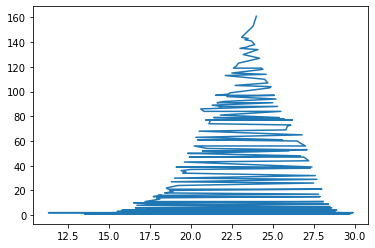

In [14]:
df['Present_Tmin'].value_counts().plot.line()


the minimum air temperature for the present day range is 22.5C to 25C

In [15]:

df['LDAPS_RHmin'].value_counts()

51.810596    2
71.658089    2
77.030350    2
98.524734    2
19.794666    2
            ..
44.005089    1
58.655628    1
58.761993    1
42.186558    1
71.359451    1
Name: LDAPS_RHmin, Length: 7672, dtype: int64

<AxesSubplot:>

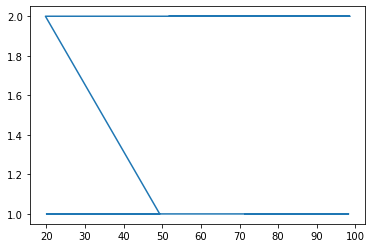

In [16]:
df['LDAPS_RHmin'].value_counts().plot.line()

line plot explains that relative humidity as per LDAPS model states that minimum humidity levels in south korea in summer is of 19% to 98% and we can see the sudden increase from 58% indicates that more places on south korea has humidity of >50%.

In [17]:
df['LDAPS_RHmax'].value_counts()

58.936283    2
96.525200    2
91.776146    2
88.876610    2
92.531029    2
            ..
83.450928    1
91.301826    1
82.626305    1
80.657700    1
83.073624    1
Name: LDAPS_RHmax, Length: 7664, dtype: int64

<AxesSubplot:>

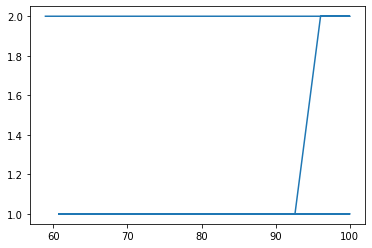

In [18]:
df['LDAPS_RHmax'].value_counts().plot.line()


plot explains about relative humidity in south korea in summer where the maximum humidity ranges from 60% to 100% and the sudden increase from 90% shows that most of the places has maximum of >90% humidity.

In [19]:
df['LDAPS_Tmax_lapse'].value_counts()

17.624954    2
38.542255    2
29.521661    1
32.201413    1
23.508736    1
            ..
30.066939    1
29.181508    1
33.268739    1
29.969835    1
27.149571    1
Name: LDAPS_Tmax_lapse, Length: 7675, dtype: int64

<AxesSubplot:>

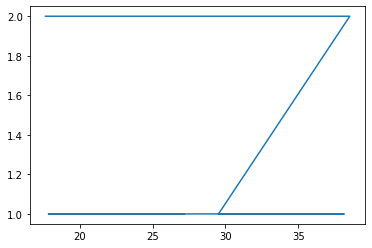

In [20]:
df['LDAPS_Tmax_lapse'].value_counts().plot.line()

In [21]:
df['LDAPS_Tmin_lapse'].value_counts()

14.272646    2
29.619342    2
21.797430    1
25.681776    1
24.143785    1
            ..
22.562532    1
20.332596    1
27.344587    1
25.081030    1
23.197572    1
Name: LDAPS_Tmin_lapse, Length: 7675, dtype: int64

<AxesSubplot:>

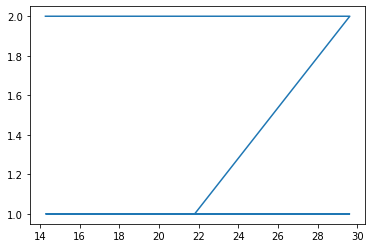

In [22]:
df['LDAPS_Tmin_lapse'].value_counts().plot.line()

In [23]:
df['LDAPS_WS'].value_counts()

2.882580     2
21.857621    2
4.633030     1
10.157699    1
5.145232     1
            ..
4.818516     1
13.419236    1
10.352374    1
5.738173     1
8.112974     1
Name: LDAPS_WS, Length: 7675, dtype: int64

<AxesSubplot:>

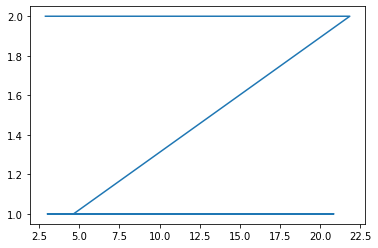

In [24]:
df['LDAPS_WS'].value_counts().plot.line()

Wind speed is varying gradually from place to place and depends on several factors but can see high of 21m/s and less of 2m/s.

In [25]:
df['LDAPS_LH'].value_counts()

-13.603212     2
 213.414006    2
 31.292903     1
 52.898936     1
 58.594891     1
              ..
 10.853051     1
 20.780082     1
 79.438871     1
 78.099351     1
 48.865865     1
Name: LDAPS_LH, Length: 7675, dtype: int64

<AxesSubplot:>

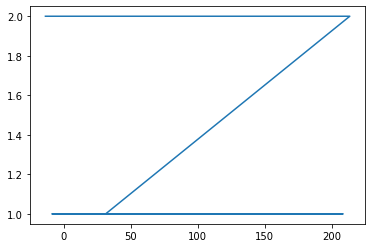

In [26]:
df['LDAPS_LH'].value_counts().plot.line()

In [27]:
df['LDAPS_CC1'].value_counts()

0.000000    108
0.967277      2
0.081400      1
0.271888      1
0.051230      1
           ... 
0.001239      1
0.494226      1
0.104894      1
0.281367      1
0.315165      1
Name: LDAPS_CC1, Length: 7569, dtype: int64

<AxesSubplot:>

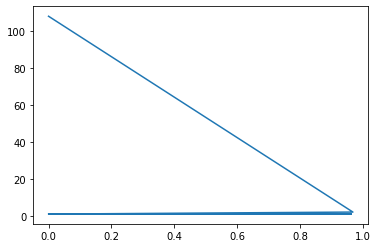

In [28]:
df['LDAPS_CC1'].value_counts().plot.line()

In [29]:
df['LDAPS_CC2'].value_counts()

0.000000    95
0.968353     2
0.546027     1
0.209168     1
0.183111     1
            ..
0.079483     1
0.103516     1
0.332022     1
0.009617     1
0.372664     1
Name: LDAPS_CC2, Length: 7582, dtype: int64

<AxesSubplot:>

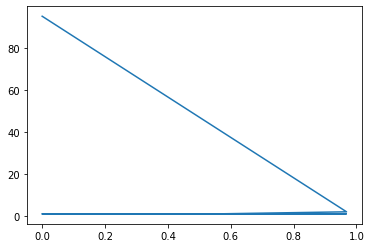

In [30]:

df['LDAPS_CC2'].value_counts().plot.line()

In [31]:
df['LDAPS_CC3'].value_counts()

0.000000e+00    76
5.810000e-07     2
8.680560e-04     2
9.837888e-01     2
2.824154e-01     1
                ..
1.931737e-01     1
1.583397e-01     1
1.600219e-01     1
1.120541e-02     1
7.488603e-02     1
Name: LDAPS_CC3, Length: 7599, dtype: int64

<AxesSubplot:>

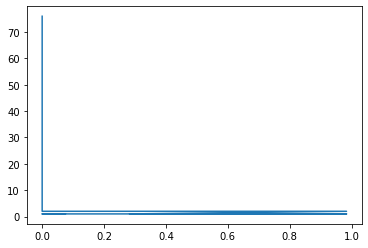

In [32]:
df['LDAPS_CC3'].value_counts().plot.line()

In [33]:
df['LDAPS_CC4'].value_counts()

0.000000    137
0.002604      7
0.005208      3
0.001736      3
0.373025      2
           ... 
0.699422      1
0.748660      1
0.228682      1
0.760407      1
0.306225      1
Name: LDAPS_CC4, Length: 7524, dtype: int64

<AxesSubplot:>

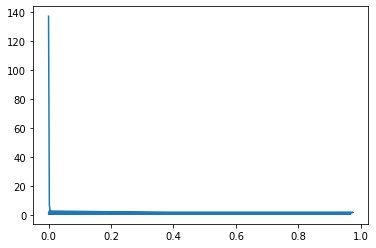

In [34]:
df['LDAPS_CC4'].value_counts().plot.line()

In [35]:
df['LDAPS_PPT1'].value_counts()

0.000000    4844
0.001953      11
0.002604       5
0.001734       3
0.000459       2
            ... 
0.935344       1
6.001337       1
0.083498       1
0.188553       1
1.229075       1
Name: LDAPS_PPT1, Length: 2812, dtype: int64

<AxesSubplot:>

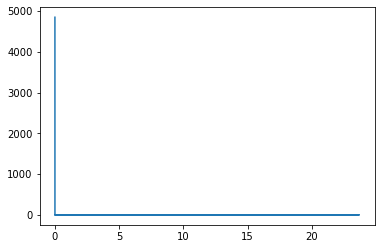

In [36]:
df['LDAPS_PPT1'].value_counts().plot.line()

In [37]:
df['LDAPS_PPT2'].value_counts()

0.000000     5151
0.001953        7
0.000040        3
0.000781        3
21.621661       2
             ... 
0.085236        1
0.041993        1
0.002633        1
0.039292        1
0.109433        1
Name: LDAPS_PPT2, Length: 2510, dtype: int64

<AxesSubplot:>

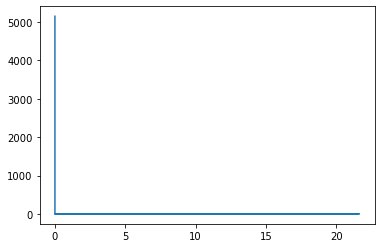

In [38]:
df['LDAPS_PPT2'].value_counts().plot.line()

In [39]:
df['LDAPS_PPT3'].value_counts()

0.000000    5294
0.001953      10
0.000852       4
0.002604       3
0.000864       2
            ... 
0.718585       1
0.041803       1
0.398969       1
0.284441       1
0.527748       1
Name: LDAPS_PPT3, Length: 2356, dtype: int64

<AxesSubplot:>

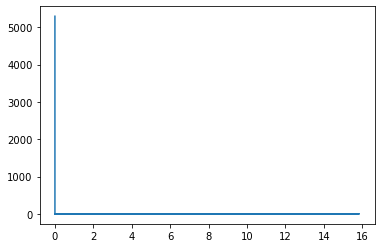

In [40]:
df['LDAPS_PPT3'].value_counts().plot.line()

In [41]:
df['LDAPS_PPT4'].value_counts()

0.000000     5751
0.001953        3
0.001909        2
0.000710        2
16.655469       2
             ... 
5.368769        1
0.113642        1
1.125897        1
0.391944        1
0.787412        1
Name: LDAPS_PPT4, Length: 1918, dtype: int64

<AxesSubplot:>

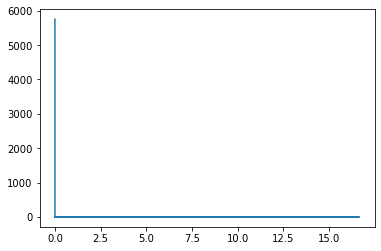

In [42]:
df['LDAPS_PPT4'].value_counts().plot.line()


he same goes for average percipitation where it is splitted for 6 hours * 4 like cloud cover.

ppt1 --> ranges lies from 0 - 24% and most station has 0%

ppt2 --> range from 0 - 20%

ppt3 --> range from 0 - 16%

ppt4 --> range from 0 -17%

In [43]:
df['lat'].value_counts()

37.5776    1240
37.5507    1240
37.5237     620
37.4697     620
37.5102     620
37.6181     620
37.4967     620
37.6046     620
37.5372     620
37.6450     311
37.4562     311
37.4832     310
Name: lat, dtype: int64

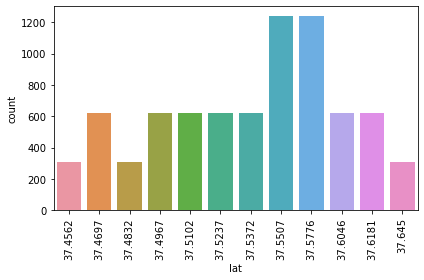

In [44]:
sns.countplot(df['lat'])
plt.xticks(rotation = 90)
plt.tight_layout()

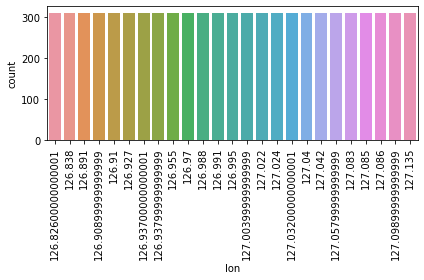

In [45]:
sns.countplot(df['lon'])
plt.xticks(rotation = 90)
plt.tight_layout()


Latitude and Longtitude explains the station place co-ordinates in South Korea.

In [46]:
df['DEM'].value_counts()

12.3700     311
212.3350    311
146.5540    310
82.2912     310
54.6384     310
35.0380     310
17.2956     310
52.5180     310
75.0924     310
15.5876     310
132.1180    310
56.4448     310
21.9668     310
26.2980     310
28.7000     310
33.3068     310
59.8324     310
53.4712     310
50.9312     310
208.5070    310
19.5844     310
30.9680     310
44.7624     310
30.0464     310
45.7160     310
Name: DEM, dtype: int64

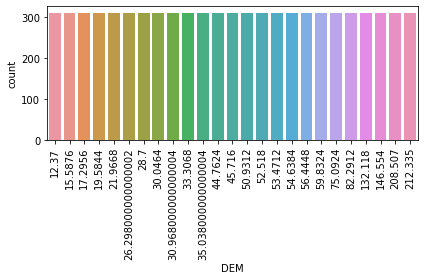

In [47]:
sns.countplot(df['DEM'])
plt.xticks(rotation = 90)
plt.tight_layout()


Elevation is same for almost all places.

now change year column splitting into moth and day and drop that column

In [48]:
df['month'] = pd.to_datetime(df['Date']).dt.month
df['day'] = pd.to_datetime(df['Date']).dt.day
df['year'] = pd.DatetimeIndex(df['Date']).year

<AxesSubplot:xlabel='year'>

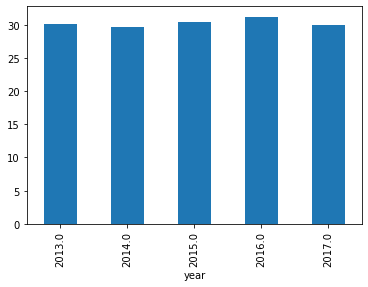

In [49]:
df.groupby('year')['Next_Tmax'].mean().plot.bar()

<AxesSubplot:xlabel='year'>

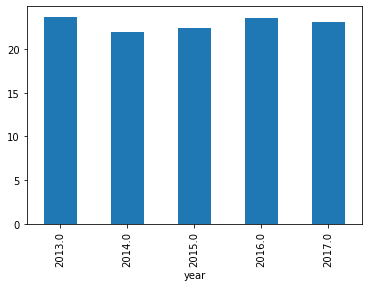

In [50]:

df.groupby('year')['Next_Tmin'].mean().plot.bar()

There is no much difference but slight on 2014-2015 on minimum air temperature than other years.

<AxesSubplot:xlabel='month'>

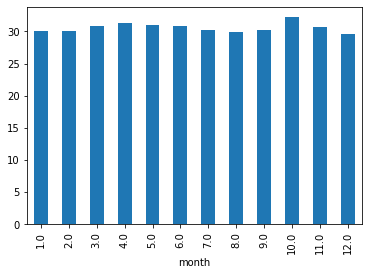

In [51]:
df.groupby('month')['Next_Tmax'].mean().plot.bar()

<AxesSubplot:xlabel='month'>

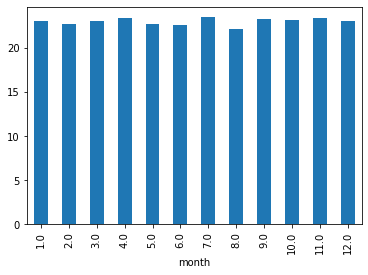

In [52]:
df.groupby('month')['Next_Tmin'].mean().plot.bar()


Comparing the month,Maximum air temperature on next day is having high temperature on month of October(10) than other months but there is no much difference and max air temperature is >30C.

In terms of minimum air temperature on next day, we can see that almost all months looks same than August which is pretty less than others.So the minimum air temperature will be >20C

Dropping the date column as it has been splitted into day,month,year

In [53]:
df = df.drop(columns = ['Date'],axis = 1)

In [54]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,day,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,6.0,30.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,6.0,30.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,6.0,30.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,6.0,30.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,6.0,30.0,2013.0


In [55]:
cols= ['Present_Tmax','Present_Tmin','LDAPS_RHmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4']
for i in cols:
    df[cols] = df[cols].fillna(df[cols].mean())

In [56]:
df['station'] = df['station'].fillna(df['station'].mode()[0])
df['month'] = df['month'].fillna(df['month'].mode()[0])
df['day'] = df['day'].fillna(df['day'].mode()[0])
df['year'] = df['year'].fillna(df['year'].mode()[0])

In [57]:
df.isnull().sum()

station              0
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
month                0
day                  0
year                 0
dtype: int64

In [58]:
df['Next_Tmax'] = df['Next_Tmax'].dropna()
df['Next_Tmin'] = df['Next_Tmin'].dropna()

In [59]:
df.isnull().sum()

station              0
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
month                0
day                  0
year                 0
dtype: int64

In [60]:
df = df.dropna()  # dropping the na values and reset the index
df= df.reset_index(drop = True)

In [61]:

df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,day,year
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,6.0,30.0,2013.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,6.0,30.0,2013.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,6.0,30.0,2013.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,6.0,30.0,2013.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,6.0,30.0,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7720,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,8.0,30.0,2017.0
7721,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,8.0,30.0,2017.0
7722,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,8.0,30.0,2017.0
7723,1.0,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,7.0,7.0,2013.0


In [62]:
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,day,year
count,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,...,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000,7725.000000
mean,13.005049,29.769552,23.224635,56.741576,88.369195,29.616226,23.511815,7.096750,62.468953,0.368485,...,37.544755,126.991370,61.926856,1.258725,5342.066031,30.274887,22.932220,7.079612,16.369061,2014.996893
std,7.215687,2.959205,2.405561,14.583630,7.164028,2.932271,2.333987,2.171835,33.556340,0.261052,...,0.050386,0.079347,54.331701,1.371331,429.235277,3.128010,2.487613,2.238210,8.242621,1.414027
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,1.000000,7.000000,2013.000000
25%,7.000000,27.800000,21.700000,46.045017,84.291199,27.696185,22.114277,5.686496,37.452979,0.148229,...,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000,7.000000,8.000000,2014.000000
50%,13.000000,29.900000,23.400000,55.266701,89.699196,29.664030,23.733589,6.564141,57.299645,0.319678,...,37.550700,126.995000,45.716000,0.618000,5437.534180,30.500000,23.100000,7.000000,16.000000,2015.000000
75%,19.000000,32.000000,24.900000,66.996681,93.704353,31.687106,25.135301,7.996899,83.897461,0.571547,...,37.577600,127.042000,59.832400,1.767800,5728.624512,32.600000,24.600000,8.000000,24.000000,2016.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,12.000000,31.000000,2017.000000


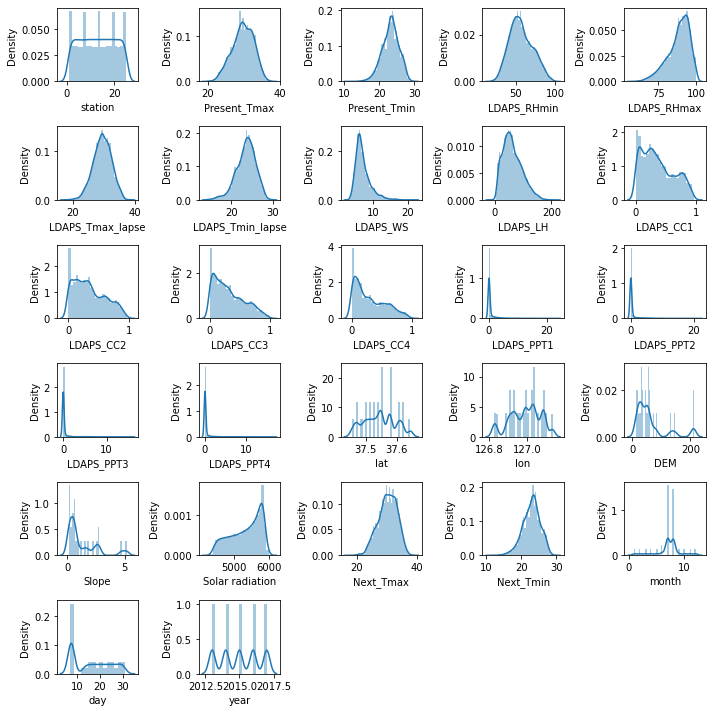

In [63]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df:
    if pltnumber<=27:
        ax = plt.subplot(6,5,pltnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

1) LDAPS_PPT1 - 4 has high positive skewness ,

2) humidity max, lapse rate max /min has moderate negative skewness,

3) windspped , heat flux has moderate positive skewness,

4) CC1-4 has moderate positive skewness,

5) month has skewness on both positive and negative,

6) next day max / min air temperature columns has slightly skewed towards left side ie.negative.

In [64]:
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
month               0
day                 0
year                0
dtype: int64

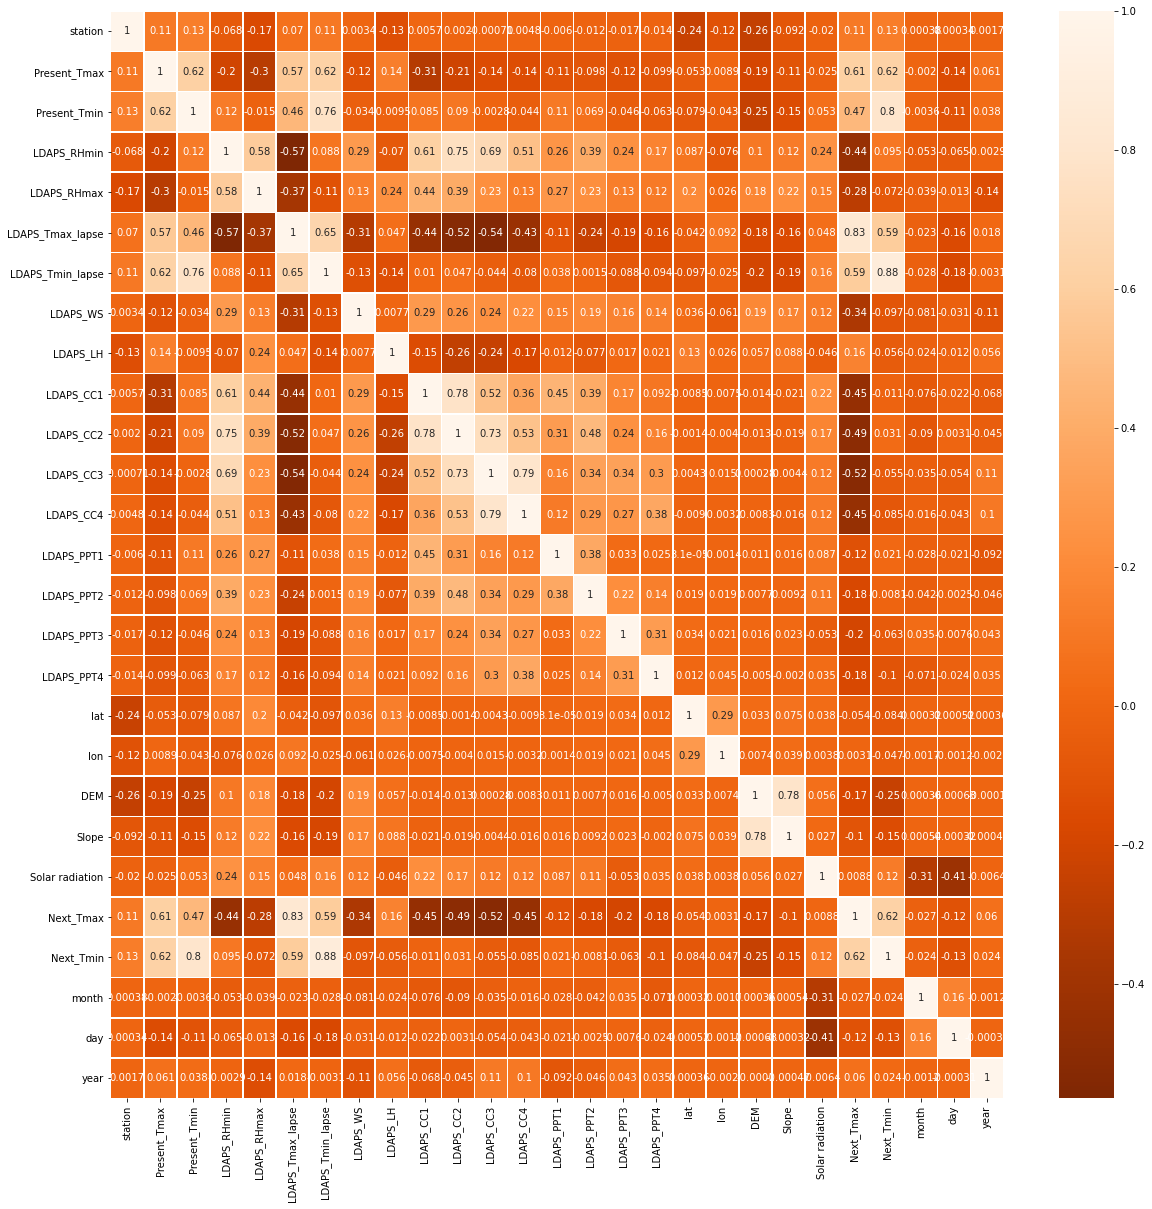

In [65]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),cmap = 'Oranges_r', annot=True, linewidths=.5, ax=ax)
plt.show()

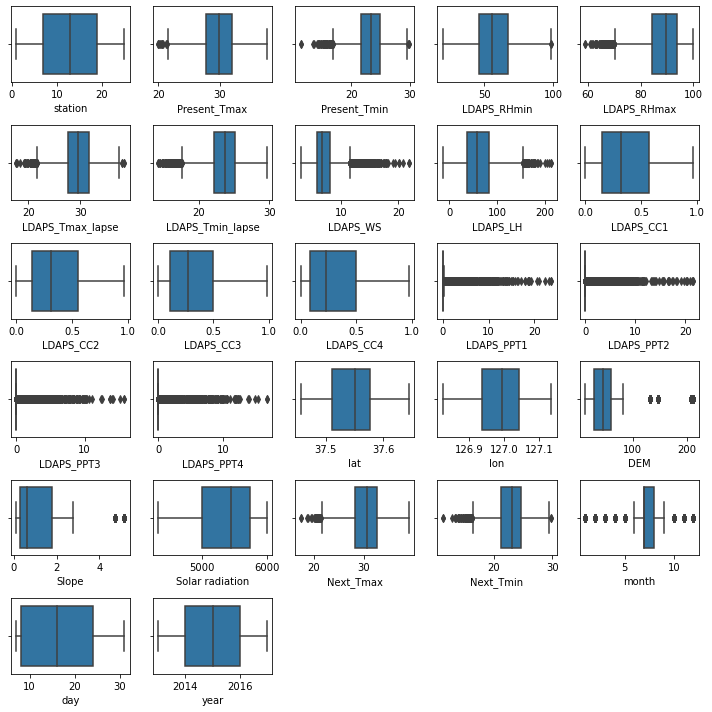

In [66]:
plt.figure(figsize = (10,10))
pltnumber = 1

for column in df:
    if pltnumber<=27:
        ax = plt.subplot(6,5,pltnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=10)
        pltnumber+=1
plt.tight_layout()

There are outliers present 

In [67]:
df.skew()

station            -0.002671
Present_Tmax       -0.264750
Present_Tmin       -0.366521
LDAPS_RHmin         0.302959
LDAPS_RHmax        -0.854116
LDAPS_Tmax_lapse   -0.227408
LDAPS_Tmin_lapse   -0.580647
LDAPS_WS            1.581465
LDAPS_LH            0.673019
LDAPS_CC1           0.460552
LDAPS_CC2           0.475215
LDAPS_CC3           0.642222
LDAPS_CC4           0.666281
LDAPS_PPT1          5.399231
LDAPS_PPT2          5.782954
LDAPS_PPT3          6.469458
LDAPS_PPT4          6.833841
lat                 0.086587
lon                -0.286558
DEM                 1.721056
Slope               1.560549
Solar radiation    -0.513787
Next_Tmax          -0.339607
Next_Tmin          -0.403743
month              -0.704300
day                 0.245795
year                0.002471
dtype: float64

In [68]:
from sklearn.preprocessing import power_transform
df_New=power_transform(df)
df_New=pd.DataFrame(df_New,columns=df.columns)

In [69]:
df_New.skew()

station            -0.205824
Present_Tmax       -0.035313
Present_Tmin       -0.012386
LDAPS_RHmin        -0.017149
LDAPS_RHmax        -0.115691
LDAPS_Tmax_lapse   -0.009266
LDAPS_Tmin_lapse   -0.017697
LDAPS_WS            0.002231
LDAPS_LH            0.057105
LDAPS_CC1           0.046895
LDAPS_CC2           0.045527
LDAPS_CC3           0.087874
LDAPS_CC4           0.126559
LDAPS_PPT1          1.405602
LDAPS_PPT2          1.578999
LDAPS_PPT3          1.748489
LDAPS_PPT4          1.960554
lat                 0.000000
lon                -0.199755
DEM                 0.039634
Slope               0.233811
Solar radiation    -0.177610
Next_Tmax          -0.039261
Next_Tmin          -0.014544
month               0.044197
day                -0.041666
year                0.000345
dtype: float64

In [70]:
df = df.sample(frac = 1)

In [71]:
X = df.drop(columns = ['Next_Tmax','lat'],axis = 1)
y = df['Next_Tmax']


In [72]:
X.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lon,DEM,Slope,Solar radiation,Next_Tmin,month,day,year
4948,11.0,29.9,22.3,51.384006,85.312462,29.816944,23.746263,6.601377,56.849748,0.414414,...,0.000000,0.000000,127.085,28.7000,0.6233,5749.513672,22.3,12.0,7.0,2016.0
7565,16.0,28.5,23.0,36.042049,91.273888,30.138674,22.380848,5.987671,95.481228,0.141433,...,0.000000,0.000000,126.995,82.2912,2.2579,4642.440918,20.2,8.0,24.0,2017.0
6142,8.0,26.5,19.3,59.186718,88.722214,22.078977,17.010794,11.579927,62.225108,0.183216,...,0.096059,0.361448,126.910,52.5180,1.5629,4438.943848,19.9,8.0,29.0,2016.0
2829,9.0,28.4,22.0,77.427254,95.409317,23.904290,21.708478,7.677282,37.823619,0.673090,...,5.701852,0.385990,126.826,50.9312,0.4125,4846.185547,21.6,8.0,20.0,2014.0
5201,14.0,33.2,25.8,51.954704,76.392387,30.358853,26.504262,7.351648,25.751694,0.465410,...,0.444699,0.000000,126.927,30.9680,0.6180,5583.572754,27.0,7.0,22.0,2016.0


In [73]:
y

4948    30.2
7565    30.8
6142    24.4
2829    25.8
5201    32.4
        ... 
6271    32.8
3429    31.5
1288    32.2
3452    33.8
4695    26.5
Name: Next_Tmax, Length: 7725, dtype: float64

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [76]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lon,DEM,Slope,Solar radiation,Next_Tmin,month,day,year
0,-0.277892,0.044085,-0.384399,-0.367392,-0.426706,0.068456,0.100456,-0.228104,-0.167467,0.175951,...,-0.240486,-0.224551,1.180080,-0.611595,-0.463394,0.949302,-0.254164,2.198501,-1.136734,0.709443
1,0.415088,-0.429046,-0.093387,-1.419459,0.405482,0.178183,-0.484596,-0.510698,0.983850,-0.869815,...,-0.240486,-0.224551,0.045747,0.374839,0.728664,-1.630039,-1.098401,0.411243,0.925850,1.416689
2,-0.693679,-1.104947,-1.631590,0.167674,0.049280,-2.570614,-2.785552,2.064368,-0.007267,-0.709746,...,-0.157129,0.076679,-1.025567,-0.173186,0.221824,-2.104162,-1.219007,0.411243,1.532493,0.709443
3,-0.555083,-0.462841,-0.509118,1.418509,0.982768,-1.948082,-0.772692,0.267317,-0.734494,1.166915,...,4.707400,0.097133,-2.084278,-0.202393,-0.617123,-1.155340,-0.535576,0.411243,0.440536,-0.705049
4,0.137896,1.159321,1.070657,-0.328257,-1.671906,0.253276,1.282201,0.117373,-1.094268,0.371310,...,0.145410,-0.224551,-0.811305,-0.569849,-0.467259,0.562681,1.635320,-0.035572,0.683193,0.709443


# Model Building

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [78]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=128)

In [79]:
#check the shape of train test split
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((6180, 25), (1545, 25), (6180,), (1545,))

In [80]:
kn = KNeighborsRegressor()
dc = DecisionTreeRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()
svm = SVR()
lin = LinearRegression

r2_Score 0.9143264043515074
CV Score 0.9149873308316495
MSE 0.8310717812297725
RMSE 0.9116313845133748
Train Score 0.9879155660229547
Test Score 0.9143264043515074


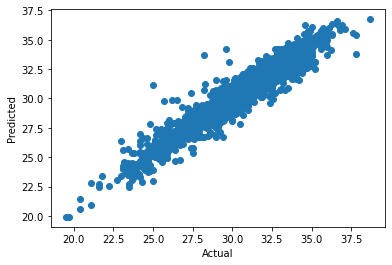

In [81]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
scr_rf = cross_val_score(rf,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_rf.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", rf.score(x_train,y_train))
print("Test Score", rf.score(x_test,y_test))


plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

r2_Score 0.7970746142459337
CV Score 0.7996747676143366
MSE 1.9684660194174755
RMSE 1.4030203203865137
Train Score 1.0
Test Score 0.7970746142459337


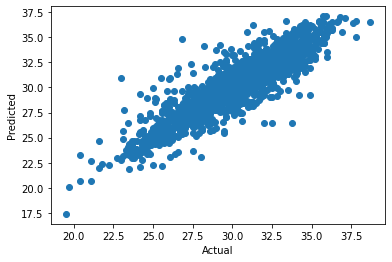

In [82]:
dc.fit(x_train,y_train)
y_pred = dc.predict(x_test)
scr_dc = cross_val_score(dc,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_dc.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", dc.score(x_train,y_train))
print("Test Score", dc.score(x_test,y_test))


plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

r2_Score 0.9087945245415334
CV Score 0.9036409423991258
MSE 0.8847334627831714
RMSE 0.9406027125110641
Train Score 0.9354906072113354
Test Score 0.9087945245415334


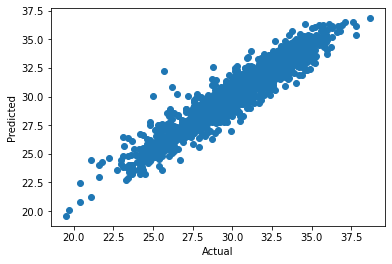

In [83]:
kn.fit(x_train,y_train)
y_pred = kn.predict(x_test)
scr_kn = cross_val_score(kn,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_kn.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", kn.score(x_train,y_train))
print("Test Score", kn.score(x_test,y_test))


plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

r2_Score 0.9352695884634843
CV Score 0.9342356849154099
MSE 0.627913629726767
RMSE 0.7924100136461976
Train Score 0.9912221650385217
Test Score 0.9352695884634843


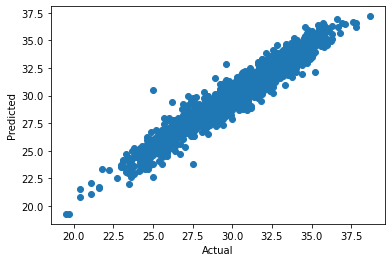

In [84]:
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
scr_xgb = cross_val_score(xgb,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_xgb.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", xgb.score(x_train,y_train))
print("Test Score", xgb.score(x_test,y_test))

plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

r2_Score 0.8897626968560344
CV Score 0.8894416841477275
MSE 1.0693506113331184
RMSE 1.0340941017785172
Train Score 0.9084068445431029
Test Score 0.8897626968560344


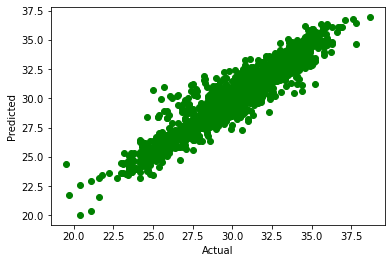

In [88]:
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
scr_svm = cross_val_score(svm,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_svm.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", svm.score(x_train,y_train))
print("Test Score", svm.score(x_test,y_test))

plt.scatter(y_test,y_pred, color = 'green')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

Comparing Cross val score with accuracy score of model, "RANDOM FOREST" is the best model.

Applying Hyper parameter tuning to the best model to check the accuracy score

# Hyper Parameter Tuning

In [89]:
params = {'n_estimators':[20,70,100],
          'max_depth':[None,5,10],
          'min_samples_split':[2,7],
          'min_samples_leaf':[1,2,4]
           }

In [90]:
grid_search = GridSearchCV(rf,params,cv=3,verbose = 2,n_jobs = 4)

In [91]:
grid_search.fit(x_train,y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 7],
                         'n_estimators': [20, 70, 100]},
             verbose=2)

In [92]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [93]:
final_model = RandomForestRegressor(criterion = 'mse', max_depth = None, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 100)
final_model.fit(x_train, y_train)
y_predict = final_model.predict(x_test)
print ('r2_Score:',r2_score(y_test,y_predict))
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

r2_Score: 0.9161025397367615
MAE: 0.6694893203883489
MSE: 0.8138424822006463
RMSE: 0.9021321866559503


In [94]:
print("r2_Score:", r2_score(y_test,y_predict))
print("Train Score:", final_model.score(x_train,y_train))
print("Test Score:", final_model.score(x_test,y_test))

r2_Score: 0.9161025397367615
Train Score: 0.9879904836100687
Test Score: 0.9161025397367615


In [95]:
cross_val_score(final_model,x,y,cv=5).mean()

0.9156534991459028

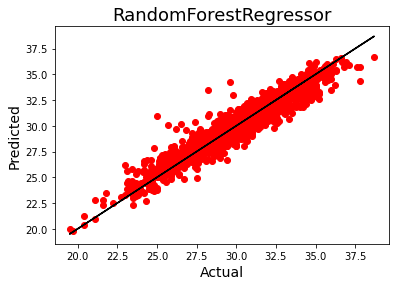

In [98]:
plt.scatter(x = y_test, y = y_predict, color = 'red')
plt.plot(y_test, y_test, color = 'black')
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('RandomForestRegressor', fontsize = 18)
plt.show()

Afterb hyperparameterb tuning our good accuracy score is 92%

In [99]:
import joblib
joblib.dump(final_model,"max_temp.prediction")

['max_temp.prediction']

# Next target variable

In [100]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,month,day,year
4948,11.0,29.9,22.3,51.384006,85.312462,29.816944,23.746263,6.601377,56.849748,0.414414,...,37.5372,127.085,28.7000,0.6233,5749.513672,30.2,22.3,12.0,7.0,2016.0
7565,16.0,28.5,23.0,36.042049,91.273888,30.138674,22.380848,5.987671,95.481228,0.141433,...,37.4697,126.995,82.2912,2.2579,4642.440918,30.8,20.2,8.0,24.0,2017.0
6142,8.0,26.5,19.3,59.186718,88.722214,22.078977,17.010794,11.579927,62.225108,0.183216,...,37.4697,126.910,52.5180,1.5629,4438.943848,24.4,19.9,8.0,29.0,2016.0
2829,9.0,28.4,22.0,77.427254,95.409317,23.904290,21.708478,7.677282,37.823619,0.673090,...,37.4967,126.826,50.9312,0.4125,4846.185547,25.8,21.6,8.0,20.0,2014.0
5201,14.0,33.2,25.8,51.954704,76.392387,30.358853,26.504262,7.351648,25.751694,0.465410,...,37.4967,126.927,30.9680,0.6180,5583.572754,32.4,27.0,7.0,22.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6271,13.0,28.7,22.0,43.769032,92.208420,32.573196,23.175801,6.470117,69.864498,0.746611,...,37.5776,127.083,59.8324,2.6865,5842.815430,32.8,24.0,3.0,7.0,2017.0
3429,9.0,25.4,21.4,58.777931,96.134323,28.482235,21.434697,7.659188,116.833841,0.194554,...,37.4967,126.826,50.9312,0.4125,5761.527344,31.5,21.7,7.0,13.0,2015.0
1288,17.0,31.4,20.6,51.108822,90.037010,32.308488,23.009588,4.692874,116.308125,0.135674,...,37.6181,127.099,53.4712,0.6970,4836.728027,32.2,20.4,8.0,20.0,2013.0
3452,7.0,29.6,22.2,40.480148,93.312553,33.198523,22.879290,5.396577,147.895097,0.163494,...,37.5776,126.838,12.3700,0.0985,5720.304688,33.8,22.7,7.0,14.0,2015.0


In [101]:
df = df.sample(frac = 1)

In [102]:
X = df.drop(columns = ['Next_Tmin','lat'],axis = 1)
y = df['Next_Tmin']

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x= pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [104]:
x.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT3,LDAPS_PPT4,lon,DEM,Slope,Solar radiation,Next_Tmax,month,day,year
0,-0.970871,-0.293866,-0.924848,-0.534887,-0.756963,0.892482,0.351314,-0.644328,-0.328158,-0.259522,...,-0.240486,0.462619,0.638121,-0.134156,-0.811691,0.763012,-0.247741,-0.035572,0.319208,0.002197
1,0.276492,-0.124890,-1.132713,-1.202540,-1.744757,-0.440827,-1.127100,-0.552414,-1.038384,-0.914206,...,-0.240486,-0.224551,-0.685268,-0.586812,-0.294277,-2.030889,-0.791253,0.411243,1.653821,-0.705049
2,1.523855,1.936607,1.569534,-1.247780,-1.682330,1.334545,1.369526,-0.565512,0.093044,-1.401354,...,-0.240486,-0.224551,-1.038171,-0.821512,-0.755830,-0.988917,1.574622,0.411243,-0.044778,0.709443
3,-1.109467,0.077880,-0.342826,1.160824,0.954537,-1.985999,-1.010304,0.561412,0.626035,1.644353,...,-0.105390,-0.177906,1.810265,-0.494934,-0.549302,1.179127,-1.846305,-2.269644,-1.136734,-0.705049
4,0.276492,-0.260071,-1.257432,-1.188558,-0.539662,0.014045,-0.816328,-0.569971,-1.112034,-1.205431,...,-0.240486,-0.224551,-0.685268,-0.586812,-0.294277,-1.848029,0.135914,0.411243,1.411164,0.002197


In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.20, random_state = 333)

r2_Score 0.9191931131267748
CV Score 0.9092469520449447
MSE 0.5127712064067452
RMSE 0.7160804468820142
Train Score 0.9267118939829185
Test Score 0.9191931131267748


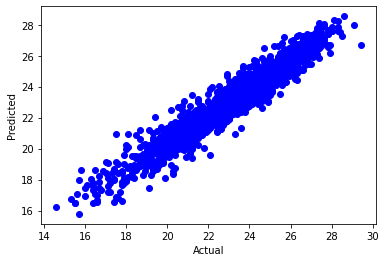

In [106]:
svm.fit(x_train,y_train)
y_pred = svm.predict(x_test)
scr_svm = cross_val_score(svm,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_svm.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", svm.score(x_train,y_train))
print("Test Score", svm.score(x_test,y_test))

plt.scatter(y_test,y_pred, color = 'blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

r2_Score 0.9185024475508178
CV Score 0.9129747412320045
MSE 0.5171539197411007
RMSE 0.7191341458595195
Train Score 0.9877131817397686
Test Score 0.9185024475508178


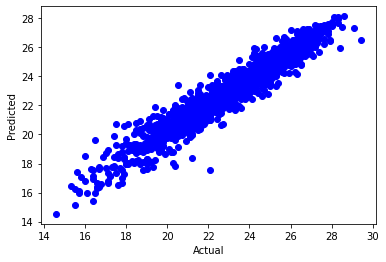

In [107]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
scr_rf = cross_val_score(rf,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_rf.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", rf.score(x_train,y_train))
print("Test Score", rf.score(x_test,y_test))

plt.scatter(y_test,y_pred, color = 'blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

r2_Score 0.8234086819274846
CV Score 0.8129052632992135
MSE 1.1205844787841261
RMSE 1.0585766286783995
Train Score 0.8229929337453641
Test Score 0.8234086819274846


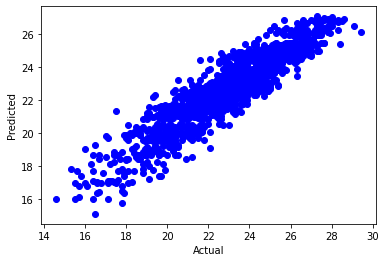

In [109]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor()
abr.fit(x_train,y_train)
y_pred = abr.predict(x_test)
scr_abr = cross_val_score(abr,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_abr.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", abr.score(x_train,y_train))
print("Test Score", abr.score(x_test,y_test))

plt.scatter(y_test,y_pred, color = 'blue')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

r2_Score 0.9455261989093401
CV Score 0.9342356849154099
MSE 0.34567099146686747
RMSE 0.5879379146362883
Train Score 0.9925017054824485
Test Score 0.9455261989093401


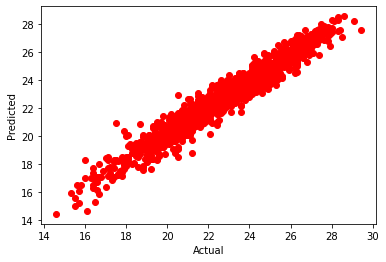

In [110]:
#gradien boost regressior
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)
scr_gbr = cross_val_score(xgb,x,y,cv=5)

print("r2_Score", r2_score(y_test,y_pred))
print("CV Score", scr_xgb.mean())
print("MSE",metrics.mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print("Train Score", xgb.score(x_train,y_train))
print("Test Score", xgb.score(x_test,y_test))

plt.scatter(y_test,y_pred, color = 'red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


Comparing Cross val score with accuracy score of model, "GradientBoostRegressior" is the best model

# Hyper Parameter Tuning

In [111]:
params = {
            'max_depth': range (2, 10, 1),
            'n_estimators': range(60, 220, 40),
            'learning_rate': [0.1, 0.01, 0.05]
}

In [112]:
grid_search = GridSearchCV(xgb, params, cv = 3)

In [113]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0, gpu_id=-1,
                                    importance_type='gain',
                                    interaction_constraints='',
                                    learning_rate=0.300000012, max_delta_step=0,
                                    max_depth=6, min_child_weight=1,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=100, n_jobs=8,
                                    num_parallel_tree=1, random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, subsample=1,
                                    tree_method='exact', validate_parameters=1,
                                    verbosity=None),
      

In [114]:
grid_search.best_params_ 

{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 180}

In [115]:
final_model =XGBRegressor(learning_rate =  0.1,max_depth = 8,n_estimators = 180)
final_model.fit(x_train, y_train)
y_predict = final_model.predict(x_test)
print ('r2_Score:',r2_score(y_test,y_predict))
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

r2_Score: 0.9513036850014808
MAE: 0.4196566888506745
MSE: 0.3090091594362265
RMSE: 0.5558859230419732


In [116]:
print("r2_Score:", r2_score(y_test,y_predict))
print("Train Score:", final_model.score(x_train,y_train))
print("Test Score:", final_model.score(x_test,y_test))

r2_Score: 0.9513036850014808
Train Score: 0.9967943181884953
Test Score: 0.9513036850014808


In [117]:
cross_val_score(final_model,x,y,cv=5).mean()

0.9471532539841266

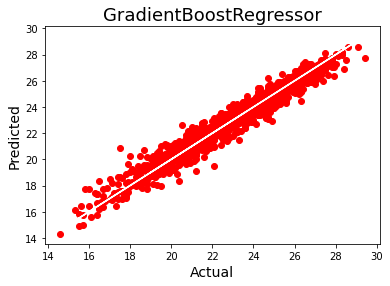

In [119]:
plt.scatter(x = y_test, y = y_predict, color = 'red')
plt.plot(y_test, y_test, color = 'white')
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('GradientBoostRegressor', fontsize = 18)
plt.show()

After hyper poaramater tuning my final model increased 2% so after that my final model accuracy score is 95%

# Saving the Model

In [120]:
import joblib
joblib.dump(final_model,"min_temp.prediction")

['min_temp.prediction']